In [2]:
import torch
from torchvision import datasets, transforms

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score


In [4]:
import torch.nn as nn
import torch.nn.functional as F

In [5]:
import torch.nn as nn
import torch.nn.functional as F

class VGG13(nn.Module):
    def __init__(self, num_classes):
        super(VGG13, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

In [6]:
# Define transformations for data augmentation and preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])



In [7]:
pwd

'/user/ssheri'

In [8]:
data = datasets.ImageFolder('/user/ssheri/train_dataset',transform=transform)

In [9]:
data.classes

['airport_terminal',
 'bus_station-indoor',
 'campsite',
 'chemistry_lab',
 'clothing_store',
 'coffee_shop',
 'computer_room']

In [10]:
label_counts = torch.bincount(torch.tensor(data.targets))
for label, count in zip(data.classes, label_counts):
    print(f"Label: {label}, Count: {count}")

Label: airport_terminal, Count: 4722
Label: bus_station-indoor, Count: 5000
Label: campsite, Count: 5000
Label: chemistry_lab, Count: 3447
Label: clothing_store, Count: 5000
Label: coffee_shop, Count: 5000
Label: computer_room, Count: 3619


In [11]:
from torch.utils.data import random_split, DataLoader

In [12]:
train_size = int(0.7 * len(data))

In [13]:

rem = len(data) - train_size

In [14]:
test=int(rem/2)

In [15]:
len(data)

31788

In [16]:
train_size = train_size+1

In [17]:
test

4768

In [18]:


train_data, test_data,val_data = random_split(data, [train_size,test,test])

In [19]:
len(train_data)

22252

In [20]:
train_loader = DataLoader(train_data, batch_size=35, shuffle=True)
test_loader = DataLoader(test_data, batch_size=35, shuffle=False)
val_loader = DataLoader(val_data,batch_size = 35, shuffle = False)

In [21]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [22]:
len(data.classes)

7

In [23]:
model = VGG13(num_classes=7)
print(model)

VGG13(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 2

In [24]:

model = VGG13(num_classes=7).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [25]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)

In [26]:

num_epochs = 50
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
patience = 4
best_loss = float('inf')

# Training loop
for epoch in range(num_epochs):
    model.train()
    training_loss = 0.0
    total = 0
    correct = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        training_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    training_loss /= len(train_loader)
    train_losses.append(training_loss)
    train_accuracy = 100 * correct / total
    train_accuracies.append(train_accuracy)

    # Validation
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for data in val_loader:
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()
    val_loss /= len(val_loader)
    val_accuracy = 100 * correct_val / total_val
    
    if val_loss<best_loss:
        best_loss = val_loss
        counter = 0
    else:
        counter = 1
    if counter == patience:
        print('early stopping occured')
        torch.save(model.state_dict(), 'resetearly.pth')
        break
    scheduler.step(val_loss)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}] Train Loss: {training_loss:.4f},Train_accuracy : {train_accuracy:.4f}%, Val Loss: {val_loss:.4f}, Val_accuracy: {val_accuracy:.4f}%")

print('Finished Training')

Epoch [1/50] Train Loss: 2.2763,Train_accuracy : 22.9957%, Val Loss: 1.7852, Val_accuracy: 27.2651%
Epoch [2/50] Train Loss: 1.7981,Train_accuracy : 26.3392%, Val Loss: 1.7107, Val_accuracy: 32.6342%
Epoch [3/50] Train Loss: 1.7407,Train_accuracy : 29.0041%, Val Loss: 1.6842, Val_accuracy: 33.2844%
Epoch [4/50] Train Loss: 1.7089,Train_accuracy : 30.4422%, Val Loss: 1.7039, Val_accuracy: 31.7534%
Epoch [5/50] Train Loss: 1.6593,Train_accuracy : 32.6488%, Val Loss: 1.6727, Val_accuracy: 34.3960%
Epoch [6/50] Train Loss: 1.5959,Train_accuracy : 36.0552%, Val Loss: 1.5049, Val_accuracy: 39.5763%
Epoch [7/50] Train Loss: 1.5360,Train_accuracy : 38.0101%, Val Loss: 1.4618, Val_accuracy: 41.7995%
Epoch [8/50] Train Loss: 1.4525,Train_accuracy : 41.1019%, Val Loss: 1.3508, Val_accuracy: 46.9799%
Epoch [9/50] Train Loss: 1.3506,Train_accuracy : 46.4183%, Val Loss: 1.2439, Val_accuracy: 53.8171%
Epoch [10/50] Train Loss: 1.2193,Train_accuracy : 53.6401%, Val Loss: 1.1222, Val_accuracy: 55.2433%

In [27]:
# 6. Save the best model
torch.save(model.state_dict(), 'VGG_project.pth')

In [32]:
correct = 0
total = 0
y_true = []
y_pred = []
test_losses = []
test_accuracies = []
test_loss = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        inputs= inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())
test_loss /= len(val_loader)
test_accuracy = 100 * correct / total
test_losses.append(test_loss)
test_accuracies.append(test_accuracy)

print('Accuracy of the network on the test images: %d %%' % (test_accuracy))
print('Test loss is ',(test_loss))

Accuracy of the network on the test images: 81 %
Test loss is  0.6043783163067198


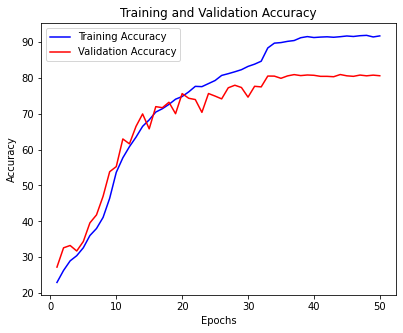

In [33]:

epochs = range(1, num_epochs + 1)
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracies, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


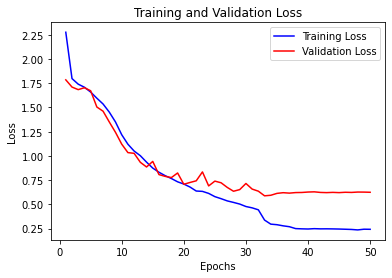

In [34]:
plt.plot(epochs, train_losses, 'b', label='Training Loss')
plt.plot(epochs, val_losses, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [35]:
from sklearn.metrics import confusion_matrix

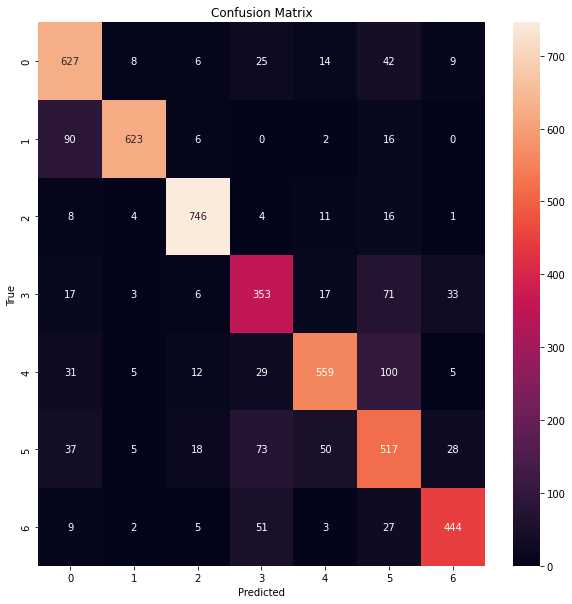

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()